In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='b9KgicYXpjM8Q6u0m5IvJ-svD0C5_jh5dF95NtQ_MqAv',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphishingdetectionsystem-donotdelete-pr-vpkpkzm5ad5uzs'
object_key = 'Unprocessed_Dataset.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
0,graphicriver.net,0,0,1,1,0,0,0,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0


# 1. Import Necessary Modules

In [2]:
#importing necessary modules required for this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sklearn as sk

# 2. Dataset Features

In [3]:
# shape of the dataset "Unprocessed_Dataset"

data.shape

(10000, 10)

In [4]:
# displaying first five records of the dataset "Unprocessed_Dataset"

data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
0,graphicriver.net,0,0,1,1,0,0,0,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0


In [5]:
# displaying last five records of the dataset "Unprocessed_Dataset"

data.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,1
9996,adplife.com,0,0,1,4,0,0,0,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,1
9999,sieck-kuehlsysteme.de,0,1,1,4,0,0,1,1,1


# 3. Data Preprocessing

In [6]:
# Dropping unnecessary columns

# The column "Domain" serves no purpose for predicting the target column so drop that column

data=data.drop(['Domain'], axis=1)

data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
0,0,0,1,1,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0
2,0,0,1,1,0,0,0,0,0
3,0,0,1,3,0,0,0,0,0
4,0,0,1,3,0,0,0,0,0


In [7]:
# Selecting Target Column

print("Here \"Ouput\" column is the target column")

Here "Ouput" column is the target column


In [8]:
# Selecting independent columns

print("Except \"Ouput\" column all other columns are independent columns")

Except "Ouput" column all other columns are independent columns


In [9]:
# Displaying the info of dataset "Unprocessed_Dataset"

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        10000 non-null  int64
 1   Have_At        10000 non-null  int64
 2   URL_Length     10000 non-null  int64
 3   URL_Depth      10000 non-null  int64
 4   Redirection    10000 non-null  int64
 5   https_http     10000 non-null  int64
 6   TinyURL        10000 non-null  int64
 7   Prefix_Suffix  10000 non-null  int64
 8   Ouput          10000 non-null  int64
dtypes: int64(9)
memory usage: 703.2 KB


## 3.1 Encoding

In [10]:
# As there is no categorical column in this dataset so there is no need for encoding

## 3.2 Oulier Detection and Replacement

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


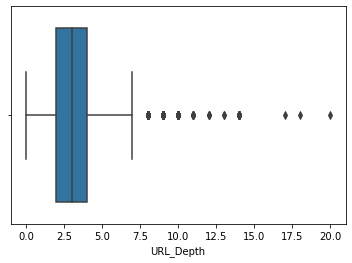

In [11]:
# As Column "URL_Depth" has numerical values so outliers may occur and other columns are categorical columns so no outliers

# Outlier Detection for column "URL_Depth" in dataset "Unprocessed_Dataset"
# And replace it with its median value

#Detection 
sns.boxplot(data.URL_Depth)
plt.show()
# This column has outliers

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


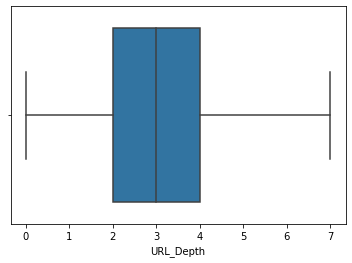

In [12]:
#Replacement
q1=data.URL_Depth.quantile(0.25)
q3=data.URL_Depth.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
data['URL_Depth']=np.where(data['URL_Depth']>upper_limit,data['URL_Depth'].median(),data['URL_Depth'])

#Boxplot after Outlier Replacement
sns.boxplot(data.URL_Depth)
plt.show()

In [13]:
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
0,0,0,1,1.0,0,0,0,0,0
1,0,0,1,1.0,1,0,0,0,0
2,0,0,1,1.0,0,0,0,0,0
3,0,0,1,3.0,0,0,0,0,0
4,0,0,1,3.0,0,0,0,0,0


## 3.3 Descriptive Statistics

In [14]:
# Display the descriptive statistics of the dataset

data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,2.841100,0.013500,0.000200,0.090300,0.093200,0.500000
std,0.073961,0.148632,0.418653,1.708433,0.115408,0.014141,0.286625,0.290727,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.4 Elimination of null values

In [15]:
# checking whether null value is present or not in each column

data.isnull().any()

# There is no null values in any column

Have_IP          False
Have_At          False
URL_Length       False
URL_Depth        False
Redirection      False
https_http       False
TinyURL          False
Prefix_Suffix    False
Ouput            False
dtype: bool

## 3.5 Unique and Value counts

In [16]:
# unique values and value counts of "Have_IP" column

data.Have_IP.value_counts()

0    9945
1      55
Name: Have_IP, dtype: int64

In [17]:
# unique values and value counts of "Have_At" column

data.Have_At.value_counts()

0    9774
1     226
Name: Have_At, dtype: int64

In [18]:
# unique values and value counts of "URL_Length" column

data.URL_Length.value_counts()

1    7734
0    2266
Name: URL_Length, dtype: int64

In [19]:
# unique values and value counts of "URL_Depth" column

data.URL_Depth.value_counts()

2.0    2298
3.0    2266
1.0    1608
4.0    1384
5.0     963
0.0     689
6.0     486
7.0     306
Name: URL_Depth, dtype: int64

In [20]:
# unique values and value counts of "Redirection" column

data.Redirection.value_counts()

0    9865
1     135
Name: Redirection, dtype: int64

In [21]:
# unique values and value counts of "https_http" column

data.https_http.value_counts()

0    9998
1       2
Name: https_http, dtype: int64

In [22]:
# unique values and value counts of "TinyURL" column

data.TinyURL.value_counts()

0    9097
1     903
Name: TinyURL, dtype: int64

In [23]:
# unique values and value counts of "Prefix_Suffix" column

data.Prefix_Suffix.value_counts()

0    9068
1     932
Name: Prefix_Suffix, dtype: int64

In [24]:
# unique values and value counts of "Ouput" column

data.Ouput.value_counts()

0    5000
1    5000
Name: Ouput, dtype: int64

# 4. Data Visualizing

## 4.1 Distribution plot of each column

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


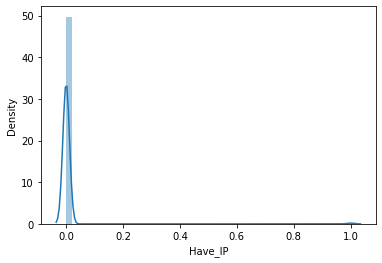

In [25]:
# "Have_IP" Column

sns.distplot(data.Have_IP)
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


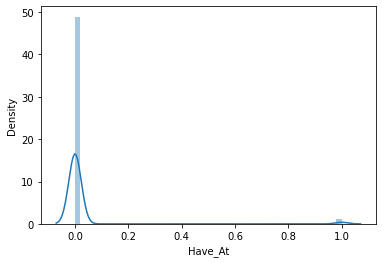

In [26]:
# "Have_At" Column

sns.distplot(data.Have_At)
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


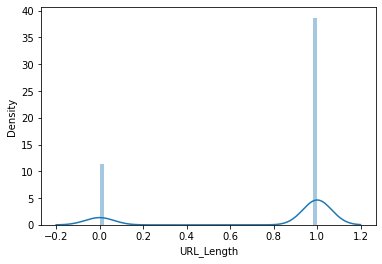

In [27]:
# "URL_Length" Column

sns.distplot(data.URL_Length)
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


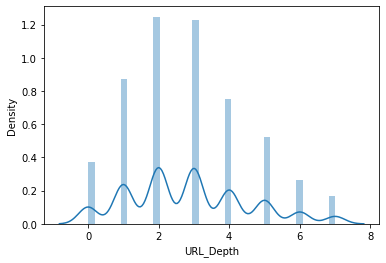

In [28]:
# "URL_Depth" Column

sns.distplot(data.URL_Depth)
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


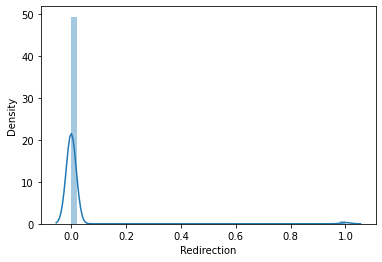

In [29]:
# "Redirection" Column

sns.distplot(data.Redirection)
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


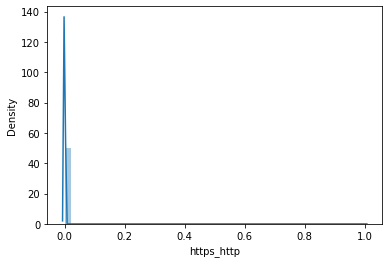

In [30]:
# "https_http" Column

sns.distplot(data.https_http)
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


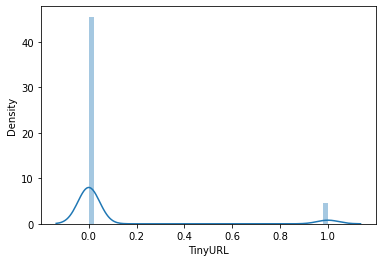

In [31]:
# "TinyURL" Column

sns.distplot(data.TinyURL)
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


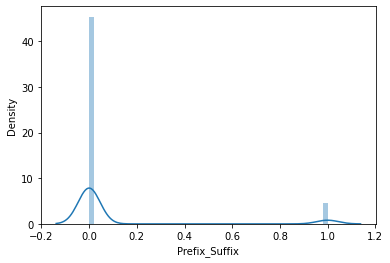

In [32]:
# "Prefix_Suffix" Column

sns.distplot(data.Prefix_Suffix)
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


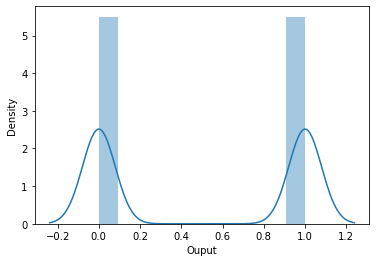

In [33]:
# "Ouput" Column

sns.distplot(data.Ouput)
plt.show()

## 4.2 Correlation and HeatMap

In [34]:
# Checking the correlation between columns

data.corr()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
Have_IP,1.000000,-0.011308,-0.076021,-0.031865,-0.008700,-0.001052,-0.023430,-0.023841,0.074367
Have_At,-0.011308,1.000000,0.067844,0.039744,-0.000297,-0.002151,0.067122,0.018369,0.118419
URL_Length,-0.076021,0.067844,1.000000,0.474285,0.038482,0.007656,-0.005318,-0.146102,-0.541287
URL_Depth,-0.031865,0.039744,0.474285,1.000000,-0.063175,0.001316,0.039721,-0.104886,-0.129540
Redirection,-0.008700,-0.000297,0.038482,-0.063175,1.000000,-0.001655,0.026634,-0.025581,0.002600
https_http,-0.001052,-0.002151,0.007656,0.001316,-0.001655,1.000000,-0.004456,-0.004534,0.014144
TinyURL,-0.023430,0.067122,-0.005318,0.039721,0.026634,-0.004456,1.000000,0.087421,0.072921
Prefix_Suffix,-0.023841,0.018369,-0.146102,-0.104886,-0.025581,-0.004534,0.087421,1.000000,0.302705
Ouput,0.074367,0.118419,-0.541287,-0.129540,0.002600,0.014144,0.072921,0.302705,1.000000


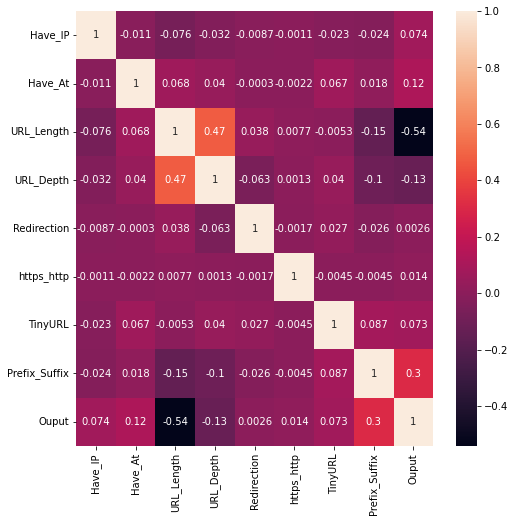

In [35]:
# Visual representation of correlation between columns(HeatMap)

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# There is no much correlation among target column and independent column

In [36]:
# finding the most correlated independent column with target column

data.corr().Ouput.sort_values(ascending=False)

#here column "Prefix_Suffix" is somewhat correlated with the target column

Ouput            1.000000
Prefix_Suffix    0.302705
Have_At          0.118419
Have_IP          0.074367
TinyURL          0.072921
https_http       0.014144
Redirection      0.002600
URL_Depth       -0.129540
URL_Length      -0.541287
Name: Ouput, dtype: float64

In [37]:
# multicollinearity

# There is no multicollinearity between any two independent columns


# 5. Training and Testing The Model

In [38]:
!pip install scikit-learn

In [39]:
from sklearn.preprocessing import scale #for scaling
from sklearn.model_selection import train_test_split # for train and test data split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # for evaluation of classification models
from sklearn.neighbors import KNeighborsClassifier # for K Neighbor Classifier model
from sklearn.model_selection import GridSearchCV # for hyper parameter tuning using grid search method

## 5.1 X and y split

In [40]:
# splitting the data into independent and target variables X and y repectively

# storing Target column "Ouput" in y
y=data['Ouput']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Ouput, dtype: int64

In [41]:
# storing independent columns in X

X=data.drop(columns=['Ouput'],axis=1)
X.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix
0,0,0,1,1.0,0,0,0,0
1,0,0,1,1.0,1,0,0,0
2,0,0,1,1.0,0,0,0,0
3,0,0,1,3.0,0,0,0,0
4,0,0,1,3.0,0,0,0,0


## 5.2. Scaling the X values

In [42]:
# As the values are close near in each column so there is no need for scaling

## 5.3 Test and Train Split

In [43]:
# splitting the data into train and test dataset in 7:3 ratio repectively

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [44]:
X_train.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix
7681,0,0,1,4.0,0,0,0,0
9031,0,0,0,0.0,0,0,0,1
3691,0,0,1,1.0,0,0,0,0
202,0,0,1,1.0,0,0,0,0
5625,0,1,1,6.0,0,0,0,0


In [45]:
X_test.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix
9394,0,0,1,5.0,0,0,0,0
898,0,0,1,6.0,0,0,0,0
2398,0,0,1,3.0,0,0,0,0
5906,0,0,1,3.0,0,0,0,0
2343,0,0,1,2.0,0,0,0,0


In [46]:
y_train.head()

7681    1
9031    1
3691    0
202     0
5625    1
Name: Ouput, dtype: int64

In [47]:
y_test.head()

9394    1
898     0
2398    0
5906    1
2343    0
Name: Ouput, dtype: int64

## 5.4. Training and Testing the model

In [48]:
# The algorithms used for this model is K Nearest Neighbors Algorithm 


### 5.4.1. K Nearest Neighbors Classifier

In [49]:
#initializing the model

knn=KNeighborsClassifier()

In [50]:
# hyper parameter tuning the model

parameters={
           "n_neighbors":[5,7,9]
           }

gsknn=GridSearchCV(estimator=knn,param_grid=parameters)

gsknn.fit(X_train,y_train)

gsknn.best_score_

0.7791428571428571

In [51]:
gsknn.best_params_ # finding the best parameters for this model

{'n_neighbors': 9}

In [52]:
knn1=KNeighborsClassifier(n_neighbors=9)

In [53]:
#Training the model

knn1.fit(X_train,y_train)
knn1_train_predict=knn1.predict(X_train)
knn1_train_predict

array([0, 1, 0, ..., 0, 1, 0])

In [54]:
# Testing The model

knn1_test_predict=knn1.predict(X_test)
knn1_test_predict

array([0, 0, 0, ..., 1, 0, 0])

#### 5.4.1.1. Evaluating the performance of this model

In [55]:
# The model is evaluated using
# 1. accuracy score
# 2. confusion matrix
# 3. classification report

##### 5.4.1.1.1 Accuracy score

In [56]:
# K Nearest Neighbors

print(" K Nearest Neighbors\n")
# On Training data
print("On Training data: ",accuracy_score(y_train,knn1_train_predict))

# On Testing Data
print("On Testing Data: ",accuracy_score(y_test,knn1_test_predict))

 K Nearest Neighbors

On Training data:  0.7905714285714286
On Testing Data:  0.7986666666666666


##### 5.4.1.1.2. confusion matrix

In [57]:
# K Nearest Neighbors

print(" K Nearest Neighbors")
confusion_matrix(y_test,knn1_test_predict)

 K Nearest Neighbors


array([[1434,   77],
       [ 527,  962]])

##### 5.4.1.1.3. Classification Report

In [58]:
# K Nearest Neighbors

print(" K Nearest Neighbors")
print(classification_report(y_test,knn1_test_predict))

 K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      1511
           1       0.93      0.65      0.76      1489

    accuracy                           0.80      3000
   macro avg       0.83      0.80      0.79      3000
weighted avg       0.83      0.80      0.79      3000



# 6. IBM Deployment

In [59]:
!pip install -U ibm-watson-machine-learning

In [60]:
from ibm_watson_machine_learning import APIClient
import json

## 6.1. Authenticate And Set Space

In [61]:
wml_credentials={
    "apikey" : "wDtCjNWnNmDwAyp3EkqOTdZFmealKljICmh_Xd4ZF0eF",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [63]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------  ------------------------
ID                                    NAME                   CREATED
26224aff-0371-4ae6-ba96-5038c5d04aec  WPDS_Deployment_Space  2022-11-21T13:20:15.344Z
------------------------------------  ---------------------  ------------------------


In [64]:
SPACE_ID="26224aff-0371-4ae6-ba96-5038c5d04aec"

In [65]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [66]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

## 6.2 Save and Deploy the Model

In [67]:
import sklearn
sklearn.__version__

'1.0.2'

In [68]:
MODEL_NAME="KNN"
DEPLOYMENT_NAME="Deployment"
DEMO_MODEL=knn1

In [69]:
#Set Python Version
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [70]:
# Setup model meta
model_props={
    wml_client.repository.ModelMetaNames.NAME : MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE : 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [71]:
# Save model
model_details=wml_client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)

In [72]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Ouput',
  'schemas': {'input': [{'fields': [{'name': 'Have_IP', 'type': 'int64'},
      {'name': 'Have_At', 'type': 'int64'},
      {'name': 'URL_Length', 'type': 'int64'},
      {'name': 'URL_Depth', 'type': 'float64'},
      {'name': 'Redirection', 'type': 'int64'},
      {'name': 'https_http', 'type': 'int64'},
      {'name': 'TinyURL', 'type': 'int64'},
      {'name': 'Prefix_Suffix', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-21T13:29:09.494Z',
  'id': '6f40dc14-61db-4570-a985-e7b7d91f89fb',
  'modified_at': '2022-11-21T13:29:12.212Z',
  'name': 'KNN',
  'owner': 'IBMid-666002N9ZU',
  'resource_key': 'e0214042-1436-43c1-a521-f002a3acd979',
  'space_id': '26224aff-0371-4ae6-ba96-5038c5d04aec'},
 'system': {'warning

In [73]:
model_id=wml_client.repository.get_model_id(model_details)
model_id

'6f40dc14-61db-4570-a985-e7b7d91f89fb'

In [74]:
# set data
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [75]:
# Deploy
deployment=wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '6f40dc14-61db-4570-a985-e7b7d91f89fb' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='49108a1a-e0a8-48e3-862d-9531ceb51ee3'
------------------------------------------------------------------------------------------------


